#**Import necessary libraries**#

In [11]:
import pandas as pd
import numpy as np
import requests
import keras
from keras.layers import Embedding, Flatten, SimpleRNN, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.utils import pad_sequences

#**Load datasets from github and split them to input and output**#

In [12]:
df = pd.read_csv('NQF.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['CLOType'] = df['CLOType'].replace({'knowledge':0, 'skill':1,  'competency':2 }) 
y = df['CLOType']

In [13]:
dataset = []
for clo in df['CLOText']:
    s = clo.replace(",",'')
    s = s.replace('.','')
    #s = re.sub(r'\s+\w+\b\S', '', clo) # Matches words that end with punctuation.
    #s = re.sub(r'\s+\S\b\w+', '', s) # Matches words that start with punctuation.
    #dataset.append(s.split(' '))
    dataset.append(s)
dataset

['Define and list the key elements of game development such as game design storytelling art and visuals programming and coding and user interface',
 'Design and develop a variety of 2D and 3D games using game engine',
 'Create compelling games for multiple platforms utilizing industry tools and software',
 'Apply industry-standard tools and software to develop and implement game assets including graphics audio and user interfaces',
 'Employ effective project planning and management strategies to ensure successful game development projects including scheduling task allocation and risk\xa0assessment',
 'Exhibit a fundamental grasp of the basic concepts and techniques involved in digital image processing',
 'Apply mathematical tools and techniques for digital image processing',
 'Analyze and interpret images in the frequency domain using Fourier transform',
 'Design and implement algorithms for digital image processing operations such as histogram equalization enhancement restoration filt

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(dataset,y, test_size=0.3)

In [ ]:
#x_train, y_train= train_df['claim_s'], train_df['fake_flag']
#x_test, y_test= test_df['claim_s'], test_df['fake_flag']

#**Apply Tokenization and Align all text sequences**#
num_words parameter in Tokenizer returns the most n frequent words that will appear in the text sequences.

In [15]:
tok = Tokenizer(num_words=6620, oov_token='[UNK]')
tok.fit_on_texts (x_train)
train_seq= tok.texts_to_sequences(x_train)
test_seq= tok.texts_to_sequences(x_test)
print (f'size of vocab is {len(tok.word_index)}')

size of vocab is 876


In [16]:
x_train[0]

'Define and list the concept of Human-Computer Interaction and its significance in enhancing usability'

In [17]:
test_seq[0:5]

[[26, 154, 310, 44, 5, 8, 68],
 [11, 2, 37, 7, 63, 2, 7, 488, 88, 10, 12, 7],
 [121, 3, 409, 118, 403, 2, 30, 43, 118, 38, 2, 40],
 [53, 57, 1, 5, 58, 631, 2, 52, 177, 10, 220, 1],
 [61,
  2,
  9,
  3,
  686,
  180,
  5,
  251,
  79,
  2,
  8,
  50,
  13,
  181,
  6,
  29,
  65,
  23,
  157,
  60]]

In [21]:
max_seq_leng= 20
vocab= len(tok.word_index)
embd_size= 100
train_seq= pad_sequences(train_seq, maxlen= max_seq_leng, padding ='post', truncating='post')
test_seq= pad_sequences(test_seq, maxlen= max_seq_leng, padding = 'post', truncating='post')
train_seq[0:4]

array([[ 30,   2,  86,   3, 269,   5, 138,  42, 115,   2,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [ 61,  49,   8,  50,  62,  20, 116, 443, 444, 445,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  9,   6, 272, 139,   5,  12, 140,  15,  10,  57,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  9, 447, 448, 449,  15,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]])

#**Text Classification Model 1 using one RNN layer**#

In [22]:
from keras.layers import LSTM
model= Sequential()
model.add(Embedding(input_dim= vocab , output_dim= embd_size, input_length= max_seq_leng))
model.add(LSTM(units = embd_size, return_sequences = False))
model.add(Dense(30))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 100)           87600     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 171,061
Trainable params: 171,061
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
result = model.fit(train_seq, y_train, epochs=10, validation_data=(test_seq, y_test) )

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/embedding_2/embedding_lookup' defined at (most recent call last):
    File "c:\Users\ASUS\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\ASUS\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\ASUS\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\ASUS\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\ASUS\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\ASUS\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\ASUS\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "c:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_21064\147724952.py", line 2, in <module>
      result = model.fit(train_seq, y_train, epochs=10, validation_data=(test_seq, y_test) )
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ASUS\anaconda3\lib\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_2/embedding_2/embedding_lookup'
indices[13,7] = 876 is not in [0, 876)
	 [[{{node sequential_2/embedding_2/embedding_lookup}}]] [Op:__inference_train_function_10969]

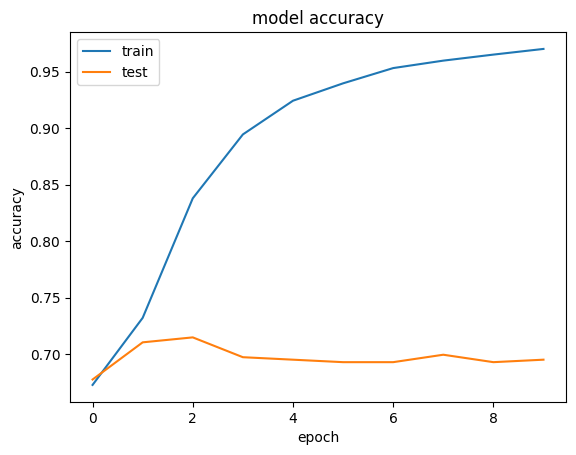

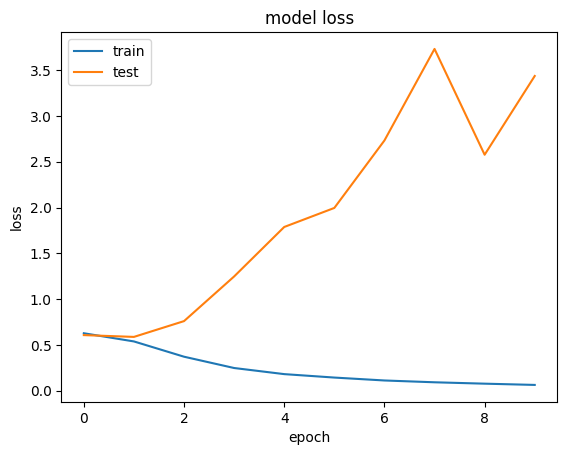

In [ ]:
import matplotlib.pyplot as plt
def plot_results(trained_model, metric):
  plt.plot(result.history[metric])
  plt.plot(result.history['val_'+metric])
  plt.title('model '+ metric)
  plt.ylabel(metric)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

plot_results(result, 'accuracy')
plot_results(result, 'loss')

In [ ]:
import tensorflow as tf

prd = model.predict(test_seq)
[1 if x>=0.5 else 0 for x in prd]

15/15 [==============================] - 1s 4ms/step


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


#**Text Classification Model 2 using one Bidirectional RNN layer**#

In [ ]:
from keras.layers import Bidirectional, Average
model= Sequential()
model.add(Embedding(input_dim=vocab , output_dim= embd_size, input_length= max_seq_leng))
model.add(Bidirectional(SimpleRNN(units= embd_size, return_sequences=True)))
model.add(Flatten())
model.add(Dense(1))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_seq, y_train, epochs=10, validation_data=(test_seq, y_test) )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 100)           662000    
                                                                 
 bidirectional (Bidirection  (None, 10, 200)           40200     
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 2000)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 704201 (2.69 MB)
Trainable params: 704201 (2.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
100/100 [==============================] - 4s 20ms/step - loss: 0.7588 - 

#**Text Classification Model 3 using Stacked RNN layers**#

In [ ]:
from keras.layers import Bidirectional
model= Sequential()
model.add(Embedding(input_dim=vocab , output_dim= embd_size, input_length= 10))
model.add(SimpleRNN(units= 10, return_sequences=True, dropout=0.2))
model.add(SimpleRNN(units= 50, return_sequences=True))
model.add(SimpleRNN(units= 60, return_sequences=False))
model.add(Dense(30))
model.add(Dense(1))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_seq, y_train, epochs=10, validation_data=(test_seq, y_test) )

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 10, 100)           662000    
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 10, 10)            1110      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 10, 50)            3050      
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 60)                6660      
                                                                 
 dense_9 (Dense)             (None, 30)                1830      
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 674681 (2.57 MB)
Trainable params: 67468